['l1', 'l1', 'l1', 'l1', 'l1', 'l1', 'l1', 'l1', 'l1', 'l1', 'l1', 'l1', 'l1', 'l1', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'l2', 'l2', 'l2', 'l2', 'l2', 'l2', 'l2', 'l2', 'l2', 'l2', 'l2', 'l2', 'l2', 'l2']


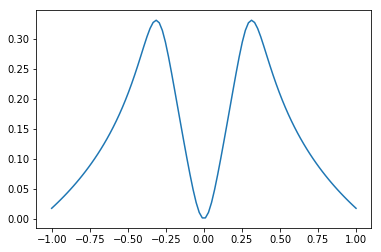

In [15]:
# testing the mask function in turning_point.py

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import potential_profile
reload(potential_profile)
import turning_point
reload(turning_point)

N_grid = 100
x = np.linspace(-1,1,N_grid)

# dot parameters
d = (200e-3,0,0.1,1)
b1 = (-200e-3,-0.3,0.1,1)
b2 = (-200e-3,0.3,0.1,1)

V = potential_profile.single_dot_V_x_wire(x,d,b1,b2)
plt.plot(x,V)

mu_l = (100e-3,100e-3)
mu_d = [100e-3]

mask,lead_info,dot_info = turning_point.get_mask_and_info(V,mu_l,mu_d)

print mask

[ 29.32212101]


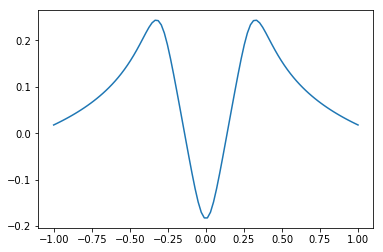

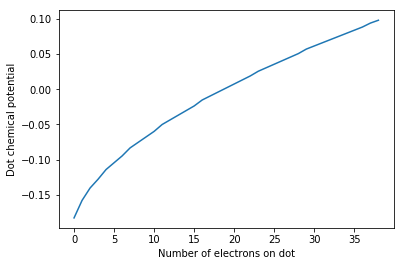

In [81]:
# testing the iterative mask tf solver

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import potential_profile
reload(potential_profile)
import turning_point
reload(turning_point)
from IPython import display
import time

N_grid = 100
x = np.linspace(-1,1,N_grid)

# dot parameters
d = (280e-3,0,0.1,1)
b1 = (-200e-3,-0.3,0.1,1)
b2 = (-200e-3,0.3,0.1,1)

V = potential_profile.single_dot_V_x_wire(x,d,b1,b2)
K = create_K_matrix(x,E_scale=1e-3,sigma=x[1]-x[0],x_0 = 1*(x[1]-x[0]))
plt.figure(1)
plt.plot(x,V)
mu_l = (100e-3,100e-3)

n_dot = 1
# estimate on dot capacity
N_dot_max = calculate_N_dot_max(x,V,K,mu_l,n_dot)
mu_vec =[]
for i in range(int(N_dot_max[0] + 10)):
    N_dot = [i]
    n,mu = solve_thomas_fermi_iter(x,V,K,mu_l,N_dot)
    mu_vec += [mu[1]]

plt.figure(2)
plt.plot(mu_vec)
plt.xlabel('Number of electrons on dot')
plt.ylabel('Dot chemical potential')

print N_dot_max

Automatic pdb calling has been turned ON
